In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.spatial import distance
from sklearn.linear_model import LinearRegression
import sklearn 
import scipy
from scipy import spatial
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

In [337]:
os.chdir("/content/drive/MyDrive/Winter_Research")

In [338]:
KS = (32, 6279, 11, 3) 
MT = (29, 6554, 11, 3) 
TX = (34, 6524, 11, 3) 
OH =(19, 5712, 11, 3)
CA = (43, 6569, 11, 3) 

In [339]:
# New Cloud Data
# CA -- 43 images, 72264 pixels, save shape (43, 6569, 11, 3)
# KS -- 32 images, 69071 pixels, save shape (32, 6279, 11, 3)
# MT -- 23 images, 72099 pixels, save shape (23, 6554, 11, 3)
# TX -- 32 images, 71764 pixels, save shape (32, 6524, 11, 3)
# OH -- 12 images, 62827 pixels, save shape (12, 5711, 11, 3)

In [417]:
loadedArr = np.loadtxt("Rois/Roi_5/Cloud_Mask_v2.csv", delimiter=',')
reshape = loadedArr.reshape(12, -1, 5)

In [418]:
reshape.shape

(12, 62827, 5)

In [ ]:
imgs = []

In [419]:
lat_lon = reshape[0, :, 3:5]
lon = lat_lon[:, 1].astype(int)
lat = lat_lon[:, 0].astype(int)

In [420]:
np.unique(lon).shape

(3387,)

In [421]:
np.unique(lat).shape

(7859,)

In [422]:
print(lon.shape, lat.shape)

(62827,) (62827,)


In [423]:
coords = {}
for i in range(len(lon)):
  if lon[i] not in coords:
    coords[lon[i]] = []
  coords[lon[i]].append(lat[i])

In [424]:
len(coords)

3387

In [ ]:
coords

In [425]:
num_pixs_around = []
for i in range(len(lon)):
  close = 0
  # print(lon[i], lat[i])
  # print(gen_around(lon[i], lat[i]))
  # break
  for neigh in gen_around_strict(lon[i], lat[i]):
    # print(neigh)
    # break
    # if lookup((lon[i], lat[i])):
    #   print("hmmmmmm")
    #   break
    if lookup(neigh, coords):
      # print("AYYYYYY")
      close += 1
  # print(close)
  # break
  num_pixs_around.append(close)

In [426]:
np.mean(num_pixs_around)

3.6278669998567494

In [427]:
neigh_np = np.array(num_pixs_around)

In [428]:
neigh_np[neigh_np < 4].shape

(17391,)

In [429]:
lon_bor = lon[neigh_np < 4]
lat_bor = lat[neigh_np < 4]

In [430]:
coords_bor = {}
for i in range(len(lon_bor)):
  if lon_bor[i] not in coords_bor:
    coords_bor[lon_bor[i]] = []
  coords_bor[lon_bor[i]].append(lat_bor[i])

In [431]:
num_pixs_border = []
for i in range(len(lon_bor)):
  close = 0
  for neigh in gen_around(lon_bor[i], lat_bor[i]):
    if lookup(neigh, coords_bor):
      close += 1
  num_pixs_border.append(close)

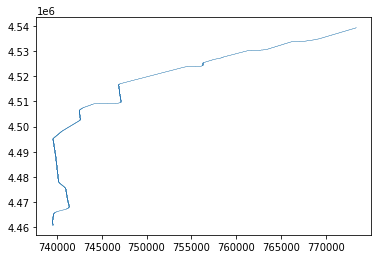

In [432]:
plt.scatter(lon_bor, lat_bor, s=0.0001)
plt.show()

In [433]:
np.mean(num_pixs_border)

2.000345006037606

In [434]:
borda = np.array(num_pixs_border)

In [435]:
borda.shape

(17391,)

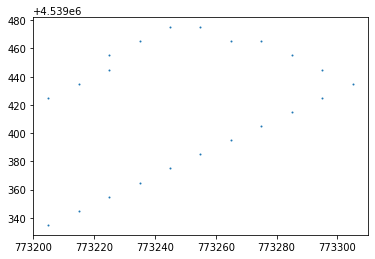

In [452]:
plt.scatter(lon_bor[np.logical_and(lon_bor > 773200, borda == 2)], lat_bor[np.logical_and(lon_bor > 773200, borda == 2)], s=1)
plt.show()

In [440]:
np.min(lat)

4460895

In [454]:
lat_bor[np.where(lon_bor == 773275)]

array([4539405, 4539465])

In [448]:
lat[np.where(lat == (np.min(lat) + 60))]

array([4460955, 4460955, 4460955, 4460955, 4460955, 4460955, 4460955])

In [380]:
np.min(lon) + 10

283735

In [324]:
lat[np.where(lon == 463875)]

array([5169035, 5169045, 5169055, 5169065, 5169075, 5169085, 5169095,
       5169105, 5169115, 5169125])

In [ ]:
(463875, 5169075)

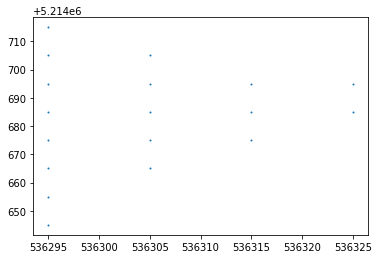

In [304]:
plt.scatter(lon[lon > 536290], lat[lon > 536290], s=1)
plt.show()

In [305]:
lon[np.where(lon == 536295)]

array([536295, 536295, 536295, 536295, 536295, 536295, 536295, 536295])

In [311]:
for idx in np.where(lon == 536325):
  print(lon[idx], lat[idx])

[536325 536325] [5214685 5214695]


In [259]:
np.max(lat)

4097825

In [260]:
print(lon[np.where(lat == np.max(lat))], lat[np.where(lat == np.max(lat))])

[684795 684805 684815 684825 684835] [4097825 4097825 4097825 4097825 4097825]


In [62]:
np.where(lon == np.max()

(array([69040, 69050, 69058]),)

In [ ]:
print(lon[684815], lat[684815])

In [ ]:
np.max(lon_bor)

4097825

In [ ]:
lon_bor[np.logical_and(lat_bor < 720000, borda == 2)].shape

(512,)

In [ ]:
row_leng = []
for key in coords:
  row_leng.append(len(coords[key]))

In [ ]:
np.mean(row_leng)

81.5478158205431

In [19]:
def gen_around(x, y):
  return [(x, y + 10), (x, y - 10), (x + 10, y), (x - 10, y), (x + 10, y + 10), (x + 10, y - 10), (x - 10, y + 10), (x - 10, y - 10)]

def gen_around_strict(x, y):
  return [(x, y + 10), (x, y - 10), (x + 10, y), (x - 10, y)]

def lookup(c, co):
  if c[0] in co:
    if c[1] in co[c[0]]:
      return True
  return False

In [ ]:
lookup((4360715, 812615), coords)

True

In [ ]:
len(coords_bor)

847

In [211]:
# For Kansas
# anchor_bt_left = (4352465, 717545)
# anchor_bt_right = (4352535, 717545)
# anchor_tp_left = (4360735, 812745)
# anchor_tp_right = (4360785, 812715)
# row_start = [(717545, 4352475), (717545, 4352485), (717545, 4352495),
#              (717545, 4352505), (717545, 4352515), (717545, 4352525)]#(717545, 4352465),  #(717545, 4352535)
# goal_pt = (812745, 4360745)

In [262]:
# For CA
# row_start = [(743545, 4022275), (743555, 4022275), (743565, 4022275), (743575, 4022275), 
#              (743585, 4022275), (743715, 4022275), (743725, 4022275)]# (743735, 4022275), (743745, 4022275)
# goal_pt = (684815,  4097825)            

In [325]:
# For MT
# row_start = [(536295, 5214645), (536295, 5214655), (536305, 5214665), (536305, 5214675), 
#  (536315, 5214675), (536315, 5214685), (536325, 5214685)] # (536325, 5214685 5214695)]

# goal_pt = (463875, 5169075)

In [407]:
# For TX
# row_start = [(374585, 3371805), (374595, 3371815), (374595, 3371825), (374605, 3371835), 
#  (374615, 3371845), (374615, 3371855), (374625, 3371865)]

# goal_pt = (283735, 3397965)
# goal_pt = [(283735, 3397935), (283735, 3397945), (283735, 3397955), (283735, 3397965),
#  (283735, 3397975),(283735, 3397985), (283735, 3397995)] # (283735, 3398005)

In [458]:
# For OH
row_start = [(739505, 4460955), (739515, 4460955), (739525, 4460955), (739535, 4460955), 
 (739545, 4460955), (739555, 4460955), (739565, 4460955)]

goal_pt = (773275, 4539465)

In [459]:
coords = np.hstack([lon[:, np.newaxis], lat[:, np.newaxis]])

In [405]:
lookup(goal_pt, coords)

True

In [406]:
for i in row_start:
  print(lookup(i, coords))

True
True
True
False
True
True
True


In [390]:
len(row_temp)

7

In [460]:
row_temp = row_start
row_win = []
temp_coords = coords.copy()
pic = []
score_profile = []
# pic.append(row_temp)
j = 0
finish = False
while not finish:
  score1 = 0
  row1 = [0] * len(row_temp)
  temp_coords1 = temp_coords.copy()
  for idx in range(len(row_temp)):
    p, s = best_pt(temp_coords1, row_temp[idx], goal_pt)
    # print(p, s)
    temp_coords1[p] = (0, 0)
    score1 += s
    row1[idx] = p
  # print(row1)
  score2 = 0
  row2 = [0] * len(row_temp)
  temp_coords2 = temp_coords.copy()
  for idx in range(len(row_temp) - 1, -1, -1):
    p, s = best_pt(temp_coords2, row_temp[idx], goal_pt)
    temp_coords2[p] = (0, 0)
    score2 += s
    row2[idx] = p
  #   print(p, s)
  # print(row2)
  score3 = 0
  row3 = [0] * len(row_temp)
  temp_coords3 = temp_coords.copy()
  for idx in [3, 4, 2, 5, 1, 0, 6]: #7, 6,
    p, s = best_pt(temp_coords3, row_temp[idx], goal_pt)
    temp_coords3[p] = (0, 0)
    score3 += s
    row3[idx] = p
    # print(p, s)
  winner = {0 : row1, 1 : row2, 2 : row3}
  win_idx = np.argmin([score1, score2, score3])
  row_win.append(win_idx)
  score_profile.append(np.min([score1, score2, score2]))
  if j % 100 == 0:
    print(j, "Row Score:", np.min([score1, score2, score2]))
  j += 1
  # print(win_idx, winner[win_idx])
  # break
  # print([winner[win_idx]])
  row_temp = temp_coords[[winner[win_idx]]].squeeze()
  # print("Row_temp", row_temp)
  pic.append(row_temp)
  if j % 100 == 0:
    print(row_temp)
  mean = np.mean(row_temp, axis=0)
  dist_mat = spatial.distance_matrix(row_temp, row_temp)
  # break
  one, two = np.unravel_index(dist_mat.argmax(), dist_mat.shape)
  if row_temp[one][1] == row_temp[two][1]:
    m = 0.0001
  elif row_temp[one][0] == row_temp[two][0]:
    m = 1000
  else:
    m = (row_temp[one][1] - row_temp[two][1]) / (row_temp[one][0] - row_temp[two][0])
  b = row_temp[one][1] - m * row_temp[one][0]
  ortho_m = -1 / m
  ortho_b = mean[1] - ortho_m * mean[0]
  signs = np.sign(ortho_m * row_temp[:, 0] + ortho_b - row_temp[:, 1])
  mean_dist = np.linalg.norm(row_temp - mean, axis=1)
  rankings = np.multiply(mean_dist, signs)
  indicies = rankings.argsort()
  row_temp = row_temp[indicies]
  for i in range(len(winner[win_idx])):
    look = winner[win_idx][i]
    if (temp_coords[look] == goal_pt).all():
      finish = True
    temp_coords[look] = (0, 0)

0 Row Score: 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


[[ 739515 4461965]
 [ 739505 4461955]
 [ 739495 4461945]
 [ 739485 4461935]
 [ 739475 4461925]
 [ 739465 4461915]
 [ 739465 4461925]]
100 Row Score: 82.36067977499789
[[ 739475 4462975]
 [ 739485 4462975]
 [ 739495 4462965]
 [ 739505 4462965]
 [ 739515 4462955]
 [ 739525 4462955]
 [ 739535 4462945]]
200 Row Score: 70.0
[[ 739515 4463985]
 [ 739525 4463985]
 [ 739535 4463985]
 [ 739545 4463985]
 [ 739555 4463985]
 [ 739565 4463985]
 [ 739575 4463975]]
300 Row Score: 82.36067977499789
[[ 739585 4465045]
 [ 739575 4465045]
 [ 739585 4465035]
 [ 739595 4465035]
 [ 739605 4465025]
 [ 739615 4465035]
 [ 739625 4465025]]
400 Row Score: 84.14213562373095
[[ 739755 4466065]
 [ 739765 4466055]
 [ 739775 4466045]
 [ 739775 4466035]
 [ 739785 4466025]
 [ 739795 4466015]
 [ 739805 4466015]]
500 Row Score: 78.2842712474619
[[ 740435 4466855]
 [ 740435 4466845]
 [ 740445 4466845]
 [ 740455 4466835]
 [ 740465 4466825]
 [ 740475 4466825]
 [ 740485 4466825]]
600 Row Score: 92.36067977499789
[[ 741135 44

In [461]:
np.mean(score_profile)

83.71005478525117

In [462]:
np.savetxt("Rois/Roi_5/score_profile.csv", score_profile)

In [463]:
row_win_np = np.array(row_win)

In [464]:
row_win_np[row_win_np == 2].shape

(1303,)

In [465]:
road_temp = np.array(pic)

In [466]:
np.savetxt("Rois/Roi_5/new_sort_template_less_1.csv", road_temp.reshape(road_temp.shape[0], -1))

In [416]:
road_temp[5000]

array([[ 330755, 3388835],
       [ 330755, 3388825],
       [ 330745, 3388815],
       [ 330735, 3388805],
       [ 330725, 3388805],
       [ 330715, 3388795],
       [ 330705, 3388785]])

In [131]:
temp_coords[[winner[win_idx]]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[[ 717545, 4352465]],

       [[ 717545, 4352475]],

       [[ 717545, 4352485]],

       [[ 717545, 4352495]],

       [[ 717545, 4352505]],

       [[ 717545, 4352515]],

       [[ 717545, 4352525]],

       [[ 717545, 4352535]]])

In [126]:
temp_coords[[5, 4, 6,7] ]

array([[ 719355, 4352325],
       [ 719345, 4352325],
       [ 719365, 4352325],
       [ 719375, 4352325]])

In [122]:
row_temp

[(717545, 4352465),
 (717545, 4352475),
 (717545, 4352485),
 (717545, 4352495),
 (717545, 4352505),
 (717545, 4352515),
 (717545, 4352525),
 (717545, 4352535)]

In [123]:
coords[2186]

array([ 717545, 4352495])

In [116]:
print(score1, score2, score3)

764450.9892398919 764450.9892398918 764450.9892398919


In [ ]:
[(0, 0)]*len(row_temp)

In [79]:
len(temp_coords)

NameError: ignored

In [77]:
np.argmin([5, 1, 2])

1

In [151]:
def best_pt(temp_coords, pt, goal_pt):
  dist = np.linalg.norm(temp_coords - pt, axis=1)
  indexes = np.where(dist == np.min(dist))[0]
  # print("indexes", indexes)
  # print("Cut in", indexes[0], indexes.squeeze()[0])
  idx = indexes[0]
  # print(temp_coords[indexes[0]].flatten(), goal_pt)
  d_min = cart_dist(temp_coords[indexes[0]].squeeze(), goal_pt)
  for i in range(1, len(indexes)):
    if cart_dist(temp_coords[indexes[i]].squeeze(), goal_pt) < d_min:
      idx = indexes[i]
      d_min = cart_dist(temp_coords[indexes[i]].squeeze(), goal_pt)
  return idx, np.min(dist)

In [97]:
def cart_dist(x1, x2):
  return ((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)**(1/2)

In [ ]:
def splice(pic, coords, x_cent, y_cent, pix_width):  
  new_img = np.zeros((x_cent.shape[0], pix_width , 2))
  centers = zip(x_cent, y_cent)
  temp_coords = coords.copy()
  for i in range(pix_width):
    x_plot = []
    y_plot = []  
    for j, (x, y) in enumerate(zip(x_cent, y_cent)):
      cent = np.array((x, y))
      dist = np.linalg.norm(temp_coords - cent, axis=1)
      index = dist.argmin()
      if (i == (pix_width - 1)) and dist[index] > 100:
        new_img[j][i][:] = [-1, -1]
        continue
      new_img[j][i][:] = pic[index][3:]
      temp_coords[index] = [0, 0]
      if temp_coords[index][0] != 0 and temp_coords[index][1] != 0:
        print(index, temp_coords[index])
  return new_img

In [ ]:
# For CA
# anchor_bt_left = (4097815, 684755)
# anchor_bt_right = (4097825, 684835)
# anchor_tp_left = (4022215, 743595)
# anchor_tp_right = (4022275, 743745)

In [18]:
path_left = []
path_right = []
def make_paths_left(path_left, point_left):
  # print("Current Point:", point_left)
  for cand in gen_left_cand(point_left):
    if candidate_pt(path_left, cand, coords_bor):
      return cand
  print("ERROR: No possible path")
  assert(False)
  return []

def make_paths_right(path_right, point_right):
  for cand in gen_left_cand(point_right):
    if candidate_pt(path_right, cand, coords_bor):
      return cand
  print("ERROR: No possible path")
  assert(False)
  return []

def candidate_pt(path, point, coords_bor):
  # print("Candidate:", path, point)
  if not lookup(point, coords_bor):
    return False
  if point in path:
    return False
  path.append(point)
  return True

def gen_left_cand(c):
  return [(c[0] - 10, c[1] + 10), (c[0], c[1] + 10), (c[0] + 10, c[1] + 10), (c[0] - 10, c[1]),
          (c[0] + 10, c[1]), (c[0] - 10, c[1] - 10), (c[0], c[1] - 10), (c[0] + 10, c[1] - 10)]

def gen_right_cand(c):
  return [(c[0] + 10, c[1] + 10), (c[0], c[1] + 10), (c[0] - 10, c[1] + 10), (c[0] + 10, c[1]),
          (c[0] - 10, c[1]), (c[0] + 10, c[1] - 10), (c[0], c[1] - 10), (c[0] - 10, c[1] - 10)]

In [ ]:
pt_left = anchor_bt_left
while pt_left != anchor_tp_left:
  pt_left = make_paths_left(path_left, pt_left)

pt_right = anchor_bt_right
while pt_right != anchor_tp_right:
  pt_right = make_paths_right(path_right, pt_right)

In [ ]:
 print(len(path_left), len(path_right))

7705 7701


In [ ]:
print(path_left[0], path_right[0])

(4097805, 684765) (4097815, 684845)


In [ ]:
print(path_left[-1], path_right[-1])

(4360735, 812745) (4360785, 812715)


In [ ]:
print(path_left[50], path_right[50])

(4352445, 718055) (4352515, 718055)


In [ ]:
print(len(path_left), len(path_right))

9520 9517


In [ ]:
same = 0
x_diff = []
for i in range(len(path_right)):
  # print(path_left[i][1])
  diff = path_left[i][1] - path_right[i][1]
  x_diff.append(path_right[i][0] - path_left[i][0])
  if diff == 0:
    same += 1

In [ ]:
len(path_right) * 6.335

48785.835

In [ ]:
np.mean(x_diff) / 10

1.5834307232826905

In [ ]:
same

0

In [ ]:
print(path_left[45], path_right[45])

(4097355, 685125) (4097365, 685205)


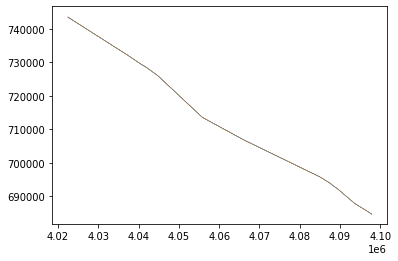

In [ ]:
x = []
y = []
x_mid = []
y_mid = []
midpts = []
for i in range(len(path_right)):
  x.append(path_right[i][0])
  x.append(path_left[i][0])
  y.append(path_right[i][1])
  y.append(path_left[i][1])
  x_mid.append((path_right[i][0] + path_left[i][0]) / 2)
  y_mid.append((path_right[i][1] + path_left[i][1]) / 2)
  midpts.append(((path_right[i][0] + path_left[i][0]) / 2, (path_right[i][1] + path_left[i][1]) / 2))
plt.scatter(x, y, s=0.0001)
plt.scatter(x_mid, y_mid, s=0.0001)
plt.show()

In [ ]:
d = []
for i in range(len(midpts) - 1):
  if dist(midpts[i], midpts[i + 1]) != 10:
    print(dist(midpts[i], midpts[i + 1]))
  d.append(dist(midpts[i], midpts[i + 1]))

In [ ]:
np.mean(d)

12.699633335325043

In [ ]:
def dist(x1, x2):
  return ((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)**(1/2)

In [ ]:
anchor_bt_left

(4352465, 717545)

In [ ]:
lookup((4352525, 717925), coords_bor)

False

In [ ]:
path_right

In [ ]:
midpts_np = np.array(midpts)

In [ ]:
midpts_np.shape

(7701, 2)

In [ ]:
midpts[6]

(4097750.0, 684850.0)

In [ ]:
np.savetxt("Rois/Roi_1/spine.csv", midpts)

In [ ]:
72242 / len(midpts)

9.38085962861966

In [ ]:
69071 - (len(midpts) * 7)

2452